In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
rock_character = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '材料')
device_wob = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '设备wob')
device_T = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '设备T')
device_wob['time'] = [int(temp) for temp in device_wob['时间/s']]
device_T['time'] = [int(temp) for temp in device_T['时间/s']]
device_S = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '设备S')
device_Z = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '设备Z')
del device_wob['时间/s']
del device_T['时间/s']
columns = ['材料2','材料4','材料5','材料7','材料8','材料10','材料11','材料13','材料55','材料21','材料22']
res_df = pd.DataFrame(columns=['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt','S','Z','res'])

for time in range(1050,1406,3):
    device_wob_temp = device_wob[(device_wob['time']>=time) & (device_wob['time']<(time+3))]
    device_T_temp = device_T[(device_T['time']>=time) & (device_T['time']<(time+3))]
    
    device_wob_temp_des = device_wob_temp[columns].describe()
    device_T_temp_des = device_T_temp[columns].describe()
    
    #每三钟算一组，统计特征,取少的这个device_T_mean
    for column in columns:
        wob_min = device_wob_temp_des[column]['min']
        wob_max = device_wob_temp_des[column]['max']
        wob_mean = device_wob_temp_des[column]['mean']
        wob_std = device_wob_temp_des[column]['std']
        wob_skew = device_wob_temp[column].skew()#偏度计算
        wob_kurt = device_wob_temp[column].kurt()#峰度计算        

        T_min = device_T_temp_des[column]['min']
        T_max = device_T_temp_des[column]['max']
        T_mean = device_T_temp_des[column]['mean']
        T_std = device_T_temp_des[column]['std']
        T_skew = device_T_temp[column].skew()#偏度计算
        T_kurt = device_T_temp[column].kurt()#峰度计算  


        S = device_S[column].values[0]
        Z = device_Z[column].values[0]
        res = column
        row = {'wob_min':wob_min,'wob_max':wob_max,'wob_mean':wob_mean,'wob_std':wob_std,'wob_skew':wob_skew,'wob_kurt':wob_kurt,'T_min':T_min,'T_max':T_max,'T_mean':T_mean,'T_std':T_std,'T_skew':T_skew,'T_kurt':T_kurt,'S':S,'Z':Z,'res':res}
        res_df.loc[len(res_df)] = row

res_df.head()

,wob_min,wob_max,wob_mean,wob_std,wob_skew,wob_kurt,T_min,T_max,T_mean,T_std,T_skew,T_kurt,S,Z,res
0,3.00286,3.65089,3.413814,0.236150,-1.001939,-0.280232,7.998,11.970,10.1435,1.191906,-0.029635,-0.159510,101.4,2.4,材料2
1,3.80704,4.15474,3.976719,0.126295,0.100818,-1.554364,8.413,10.248,9.3901,0.607808,-0.250214,-1.231008,71.5,2.8,材料4
2,4.08101,4.31455,4.213552,0.081998,-0.459574,-1.095551,15.572,18.853,16.9028,1.003761,0.619745,-0.064846,67.9,2.6,材料5
3,3.26430,5.01131,4.058786,0.532198,0.146446,-0.403349,5.894,9.269,6.8684,1.142407,1.465707,1.058720,65.7,"1,7",材料7
4,3.75266,3.96912,3.857168,0.071982,0.244940,-1.211552,12.974,14.166,13.4431,0.452866,0.748555,-0.928809,72.9,2.9,材料8


In [38]:
res = pd.merge(left=res_df,right = rock_character, left_on = 'res', right_on ='岩性名称')
# 显示所有列
pd.set_option('display.max_columns', None)
res = res.drop(['序号', '岩性名称', '粒径', '拉强比', '脆性指数'], axis=1)
res.head(n=10)

,wob_min,wob_max,wob_mean,wob_std,wob_skew,wob_kurt,T_min,T_max,T_mean,T_std,T_skew,T_kurt,S,Z,res,设备S,设备Z,静态抗压强度,弹性模量,泊松比,抗拉强度,黏聚力,内摩擦角,回弹均值,动态强度,滑动摩擦系数,声级,波速,密度均值,渗透率,孔隙度,标定温度
0,3.00286,3.65089,3.413814,0.236150,-1.001939,-0.280232,7.998,11.970,10.143500,1.191906,-0.029635,-0.159510,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
1,2.94301,3.68661,3.445723,0.233032,-1.300229,1.825893,7.729,11.722,9.896000,1.476044,-0.212896,-1.272081,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
2,3.13777,3.58919,3.452857,0.162115,-0.970448,-0.402823,7.371,11.553,9.998000,1.337848,-0.663097,-0.087198,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
3,3.12568,3.66841,3.462618,0.197012,-0.965071,-0.315246,7.635,11.316,9.723333,1.133635,-0.272630,0.348469,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
4,3.09211,3.70193,3.497716,0.172160,-1.359834,3.232517,7.677,11.896,9.825100,1.427393,-0.221311,-1.061463,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
5,3.08004,3.70812,3.386474,0.185854,-0.200894,0.630906,7.814,11.970,9.915000,1.485106,0.265430,-1.271927,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
6,3.04238,3.75137,3.461536,0.196606,-0.667626,1.681516,8.141,11.822,9.702000,1.233535,0.315310,-1.174216,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
7,3.03917,3.79027,3.482330,0.211688,-0.872401,1.943167,8.035,11.601,9.445444,1.268357,0.692701,-0.957530,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
8,2.89840,3.75573,3.388337,0.271653,-0.691519,-0.109878,8.325,11.938,9.625500,1.370101,0.831022,-1.068247,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21
9,2.98792,3.81703,3.469089,0.291996,-0.227357,-1.116429,7.677,11.179,9.774333,1.163278,-0.742342,-0.561894,101.4,2.4,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,60.21


The training time = 0.09400010108947754
The R2_score = 0.9861986510726363
The rmse of prediction is: 1.1735397991570296


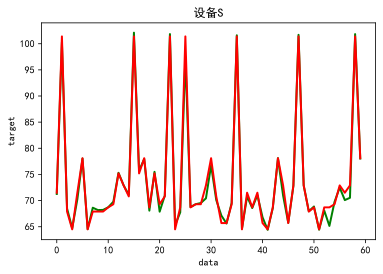

The training time = 0.09600234031677246
The R2_score = 0.9761907638288071
The rmse of prediction is: 0.09798455418435634


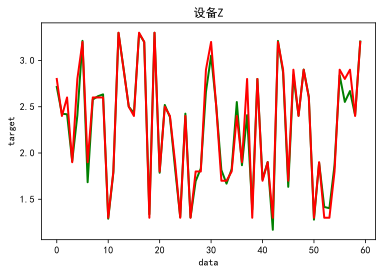

The training time = 0.10563850402832031
The R2_score = 0.9915436169556285
The rmse of prediction is: 4.460396790358078


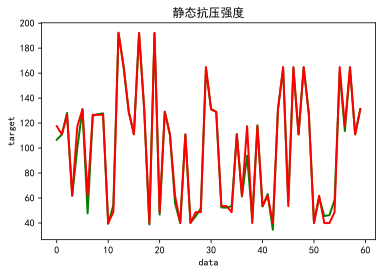

The training time = 0.0950007438659668
The R2_score = 0.9892428372362285
The rmse of prediction is: 1.746690218513303


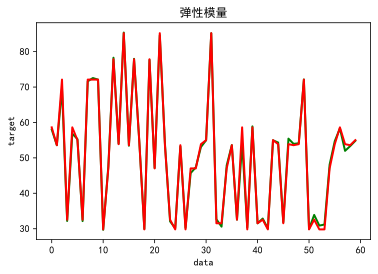

The training time = 0.09000134468078613
The R2_score = 0.9512223462126665
The rmse of prediction is: 0.00782922769438143


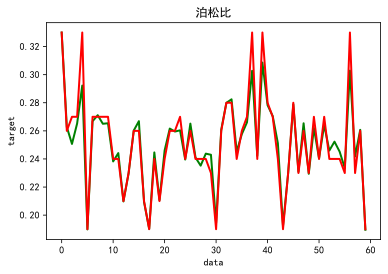

The training time = 0.10100102424621582
The R2_score = 0.9436869215870474
The rmse of prediction is: 0.6770756088837055


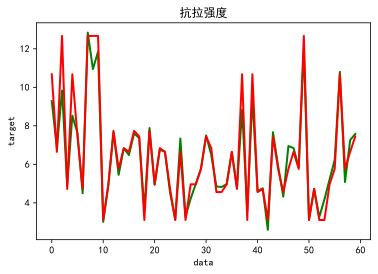

The training time = 0.09900093078613281
The R2_score = 0.9389558300214268
The rmse of prediction is: 0.9705809337319626


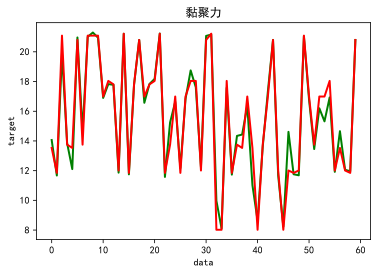

The training time = 0.0950009822845459
The R2_score = 0.9475465804552731
The rmse of prediction is: 1.0662601584265567


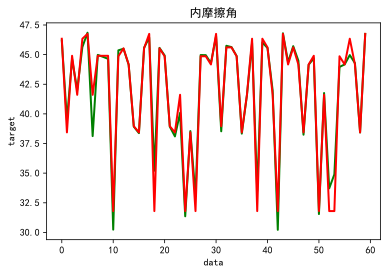

The training time = 0.09000062942504883
The R2_score = 0.9834814991375271
The rmse of prediction is: 1.6655857398874094


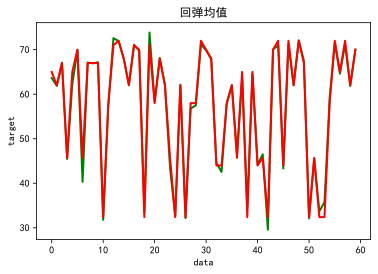

The training time = 0.095001220703125
The R2_score = 0.9722094629436581
The rmse of prediction is: 10.308381610202467


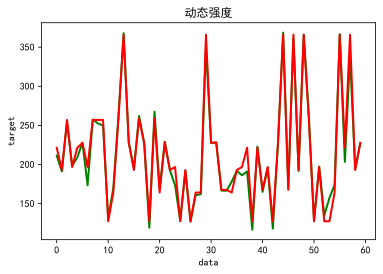

The training time = 0.08800053596496582
The R2_score = 0.9723770307212855
The rmse of prediction is: 0.0064255093637057056


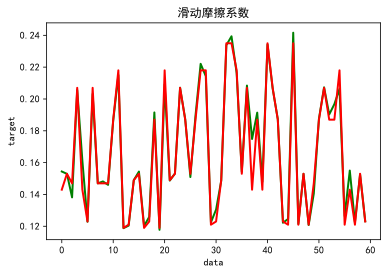

The training time = 0.08600163459777832
The R2_score = 0.9736528848746234
The rmse of prediction is: 0.7444598262923272


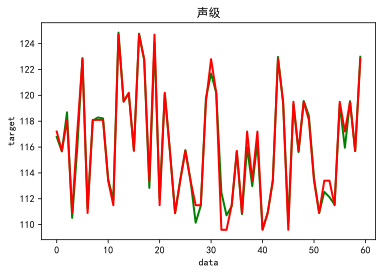

The training time = 0.09300017356872559
The R2_score = 0.9803783198013645
The rmse of prediction is: 0.16811018023584617


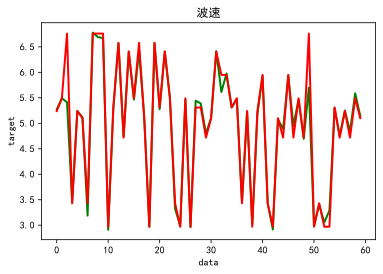

The training time = 0.0969998836517334
The R2_score = 0.9720540545664884
The rmse of prediction is: 0.09131601723916545


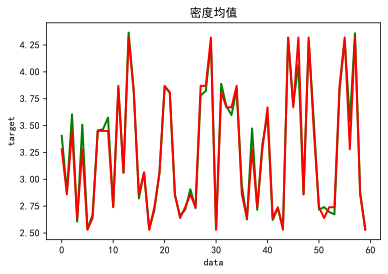

The training time = 0.09312176704406738
The R2_score = 0.9749985031201459
The rmse of prediction is: 0.008739530144370388


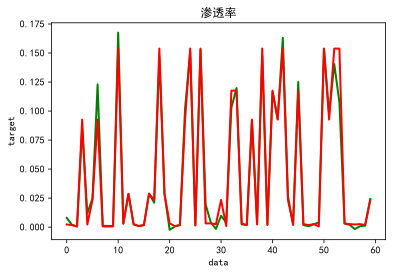

The training time = 0.10500168800354004
The R2_score = 0.9808612742481073
The rmse of prediction is: 0.859845237719322


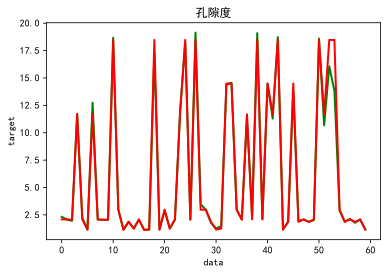

The training time = 0.08200216293334961
The R2_score = 0.9909192063407711
The rmse of prediction is: 0.3955468671087328


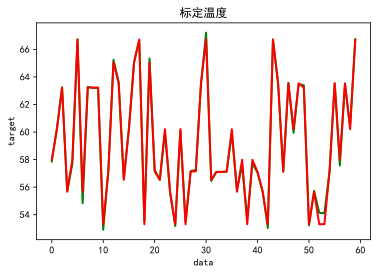

In [14]:
columns = ['设备S','设备Z','静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '回弹均值', '动态强度', '滑动摩擦系数', '声级', '波速', '密度均值', '渗透率', '孔隙度', '标定温度']

import xgboost as xgb
from xgboost import plot_importance,plot_tree
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']
X = res[xx]

for pred_y in columns:
    ## Y为要预测的数值
    y = res[pred_y]
    feature_name =X.columns
    #将数据分割训练数据与测试数据
    #print(np.isnan(X).any())
    from sklearn.model_selection import train_test_split
    # 随机采样20%的数据构建测试样本，其余作为训练样本
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=1)

    dtrain = xgb.DMatrix(Xtrain, ytrain,feature_names=feature_name)
    dtest = xgb.DMatrix(Xtest,feature_names=feature_name)
    #{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
    params = {'booster':'gbtree',
              'objective':'reg:squarederror',
              'eta':0.1,
              'gamma':0,
           #  'alpha':0,
           #  'lambda':3,
              'max_depth':7,
              'subsample':0.6849912226732566,
              'colsample_bytree':0.9269737580495006,
              'min_child_weight':1,
              'learning_rate':0.1970728149783871,
            #  'seed':1000,
              'nthread':1
              }
    num_round = 50

    start_time = time.time()
    bst = xgb.train(params, dtrain, num_round)
    end_time = time.time()
    print('The training time = {}'.format(end_time - start_time))

    # 保存模型
    bst.save_model("model_"+pred_y+".xgb")  # 将模型保存为model.xgb文件

    # 加载已保存的模型
    loaded_bst = xgb.Booster()
    loaded_bst.load_model("model_"+pred_y+".xgb")  # 从model.xgb文件加载模型

    # 使用加载后的模型进行预测
    bst_ypred = loaded_bst.predict(dtest)
    r2score = r2_score(ytest, bst_ypred)
    bst_rmse = mean_squared_error(ytest, bst_ypred) ** 0.5

    print('The R2_score = {}'.format(r2score))
    print('The rmse of prediction is:', bst_rmse)
    #plot_importance(bst,importance_type="weight")
    plt.figure()
    plt.plot(range(60), bst_ypred[:60], c="g", label="ypred", linewidth=2)
    plt.plot(range(60), ytest[:60], c="r", label="ytest", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title(pred_y)
    plt.show()

In [28]:
#模型输入数据
wob = [3.52979,3.5755,3.02758,3.65089,3.30212,3.63342,3.38165,3.46744,3.56689,3.00286]
T = [11.48,9.597,10.277,11.4,7.998,9.718,10.092,11.97,9.343,9.56]
pred_y = ['设备Z','静态抗压强度', '弹性模量', '泊松比']

#数据预处理
df = pd.DataFrame(columns=['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt'])

wob_min = np.min(wob)
wob_max = np.max(wob)
wob_mean = np.mean(wob)
wob_std = np.std(wob, ddof=1)  # ddof=0 对于样本标准差，ddof=1 对于总体标准差
wob_skew = pd.Series(wob).skew()
wob_kurt = pd.Series(wob).kurt()

T_min = np.min(T)
T_max = np.max(T)
T_mean = np.mean(T)
T_std = np.std(T, ddof=1)  # ddof=0 对于样本标准差，ddof=1 对于总体标准差
T_skew = pd.Series(T).skew()
T_kurt = pd.Series(T).skew()

row = {'wob_min':wob_min,'wob_max':wob_max,'wob_mean':wob_mean,'wob_std':wob_std,'wob_skew':wob_skew,'wob_kurt':wob_kurt,'T_min':T_min,'T_max':T_max,'T_mean':T_mean,'T_std':T_std,'T_skew':T_skew,'T_kurt':T_kurt}
df.loc[len(df)] = row

for pred in pred_y:
    # 加载已保存的模型
    loaded_bst = xgb.Booster()
    loaded_bst.load_model("model_"+pred+".xgb")  # 从model.xgb文件加载模型
    # 使用加载后的模型进行预测
    feature_name =df.columns
    dtest = xgb.DMatrix(df,feature_names=feature_name)
    bst_ypred = loaded_bst.predict(dtest)

    print(pred+':',bst_ypred)


设备Z: [2.400182]
静态抗压强度: [111.0774]
弹性模量: [53.751884]
泊松比: [0.25958595]


In [43]:
cols = ['res','设备S', '静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '波速', '密度均值', '孔隙度', '标定温度']

sss = res[cols]
ssss = sss.drop_duplicates(subset=['res'], keep='first')
ssss

,res,设备S,静态抗压强度,弹性模量,泊松比,抗拉强度,黏聚力,内摩擦角,波速,密度均值,孔隙度,标定温度
0,材料2,101.4,110.95,53.58,0.26,6.65,11.85,38.44,5.49,2.86,2.08,60.21
119,材料4,71.5,117.49,58.62,0.33,10.68,13.53,46.34,5.24,3.28,2.09,57.99
238,材料5,67.9,126.65,72.11,0.27,12.67,21.09,44.90,6.76,3.45,2.06,63.23
357,材料7,65.7,53.53,31.54,0.28,4.56,8.02,45.61,5.95,3.67,14.49,57.11
476,材料8,72.9,164.87,53.87,0.23,5.76,12.01,44.17,4.72,4.32,1.87,63.54
595,材料10,69.3,48.66,47.03,0.24,4.96,18.04,44.86,5.31,3.87,2.97,57.14
714,材料11,75.2,192.15,77.85,0.21,7.74,17.81,45.53,6.58,3.06,1.14,65.07
833,材料13,70.8,129.06,85.21,0.26,6.84,21.22,38.96,6.41,3.81,1.25,56.53
952,材料55,68.7,39.96,29.81,0.24,3.11,16.99,31.80,2.97,2.74,18.47,53.31
1071,材料21,64.5,61.84,32.55,0.27,4.72,13.75,41.61,3.43,2.64,11.68,55.67


In [50]:
#模型输入数据
wob = [3.52979,3.5755,3.02758,3.65089,3.30212,3.63342,3.38165,3.46744,3.56689,3.00286]
T = [11.48,9.597,10.277,11.4,7.998,9.718,10.092,11.97,9.343,9.56]


#数据预处理
df = pd.DataFrame(columns=['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt'])

wob_min = np.min(wob)
wob_max = np.max(wob)
wob_mean = np.mean(wob)
wob_std = np.std(wob, ddof=1)  # ddof=0 对于样本标准差，ddof=1 对于总体标准差
wob_skew = pd.Series(wob).skew()
wob_kurt = pd.Series(wob).kurt()
T_min = np.min(T)
T_max = np.max(T)
T_mean = np.mean(T)
T_std = np.std(T, ddof=1)  # ddof=0 对于样本标准差，ddof=1 对于总体标准差
T_skew = pd.Series(T).skew()
T_kurt = pd.Series(T).skew()
row = {'wob_min':wob_min,'wob_max':wob_max,'wob_mean':wob_mean,'wob_std':wob_std,'wob_skew':wob_skew,'wob_kurt':wob_kurt,'T_min':T_min,'T_max':T_max,'T_mean':T_mean,'T_std':T_std,'T_skew':T_skew,'T_kurt':T_kurt}
df.loc[len(df)] = row

##方案一：直接使用分类模型
import pickle
loaded_model = pickle.load(open("材料_classifier.dat", "rb"))
ypreds = loaded_model.predict(df)
print(le.inverse_transform(ypreds))


#方案二：计算各种属性，计算其与标注属性之间的距离
cols = ['设备S', '静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '波速', '密度均值', '孔隙度', '标定温度']
res_list = []
for pred in cols:
    # 加载已保存的模型
    loaded_bst = xgb.Booster()
    loaded_bst.load_model("model_"+pred+".xgb")  # 从model.xgb文件加载模型
    # 使用加载后的模型进行预测
    feature_name =df.columns
    dtest = xgb.DMatrix(df,feature_names=feature_name)
    bst_ypred = loaded_bst.predict(dtest)
    res_list.append(bst_ypred[0])
    print(pred+':',bst_ypred)
print(res_list)

cl2 = [101.4,110.95,53.58,0.26,6.65,11.85,38.44,5.49,2.86,2.08,60.21]
cl4 = [71.5,117.49,58.62,0.33,10.68,13.53,46.34,5.24,3.28,2.09,57.99]
cl5 = [67.9,126.65,72.11,0.27,12.67,21.09,44.90,6.76,3.45,2.06,63.23]
cl7 = [65.7,53.53,31.54,0.28,4.56,8.02,45.61,5.95,3.67,14.49,57.11]
cl8 = [72.9,164.87,53.87,0.23,5.76,12.01,44.17,4.72,4.32,1.87,63.54]
cl10 = [69.3,48.66,47.03,0.24,4.96,18.04,44.86,5.31,3.87,2.97,57.14]
cl11 = [75.2,192.15,77.85,0.21,7.74,17.81,45.53,6.58,3.06,1.14,65.07]
cl13 = [70.8,129.06,85.21,0.26,6.84,21.22,38.96,6.41,3.81,1.25,56.53]
cl55 = [68.7,39.96,29.81,0.24,3.11,16.99,31.80,2.97,2.74,18.47,53.31]
cl21 = [64.5,61.84,32.55,0.27,4.72,13.75,41.61,3.43,2.64,11.68,55.67]
cl22 = [78.1,131.05,55.01,0.19,7.45,20.80,46.75,5.10,2.53,1.16,66.72]

resss = {'cl2':cl2,'cl4':cl4,'cl5':cl5,'cl7':cl7,'cl8':cl8,'cl10':cl10,'cl11':cl11,'cl13':cl13,'cl55':cl55,'cl21':cl21,'cl22':cl22}
min_dis = float('inf')
cl = ''
for key,temp in resss.items():
    
    dis = np.linalg.norm(np.array(res_list) - np.array(temp))
    
    if dis < min_dis:
        min_dis = dis
        cl = key
print(cl)



['材料2']
设备S: [101.33363]
静态抗压强度: [111.0774]
弹性模量: [53.751884]
泊松比: [0.25958595]
抗拉强度: [6.665778]
黏聚力: [11.853376]
内摩擦角: [38.52101]
波速: [5.519961]
密度均值: [2.8778915]
孔隙度: [2.1164215]
标定温度: [60.227367]
[101.33363, 111.0774, 53.751884, 0.25958595, 6.665778, 11.853376, 38.52101, 5.519961, 2.8778915, 2.1164215, 60.227367]
cl2


In [31]:
# xgboost分类器
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
xxx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kurt','T_min','T_max','T_mean','T_std','T_skew','T_kurt']
X = res[xxx]

# 假设y是包含标签的Pandas系列或numpy数组
y_encoded = le.fit_transform(res['res'])
res['label'] = y_encoded
Y = res['label']

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score # 衡量模型的优劣
# 随机采样20%的数据构建测试样本，其余作为训练样本
Xtrain1, Xtest1, ytrain, ytest = train_test_split(X, Y,test_size=0.2)
Xtrain,Xtest = Xtrain1, Xtest1
model = xgb.XGBClassifier(random_state=1,learning_rate=0.1,use_label_encoder=False)
model.fit(Xtrain, ytrain)
print(model)
print('Accuracy over train set: ', model.score(Xtrain, ytrain))
# print('Accuracy over test set: ', model.score(Xtest,ytest))

# test_pred = model.predict(Xtest)
# accuracy = accuracy_score(ytest, test_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print('Accuracy over all set: ', model.score(pd.concat([Xtrain,Xtest]), pd.concat([ytrain,ytest])))

#模型保存
import pickle
pickle.dump(model, open("材料_classifier.dat","wb"))
loaded_model = pickle.load(open("材料_classifier.dat", "rb"))
# print("Loaded model from: modelOut.dat")

# 模型预测
ypreds = loaded_model.predict(Xtest)
accuracy = accuracy_score(ytest, ypreds)
print("Accuracy1: %.2f%%" % (accuracy * 100.0))
print('Accuracy over all set: ', loaded_model.score(pd.concat([Xtrain,Xtest]), pd.concat([ytrain,ytest])))


ss=pd.DataFrame()
ss['real']=le.inverse_transform(ytest)
ss['pred']=le.inverse_transform(ypreds)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, ...)
Accuracy over train set:  1.0
Accuracy1: 97.71%
Accuracy over all set:  0.9954163483575248
